# Models

In this notebook we will first build a Random Forest Classification model before moving onto Neural Networks to see if we can correctly classify the different sounds in the UrbanSound8K dataset.

There are 10 classes of sounds:
1. air conditioner 
2. car horn 
3. children playing
4. dog bark 
5. drilling
6. engine idling
7. gun shot
8. jackhammer 
9. siren
10. street_music

In [94]:
#Necessary libraries for modeling 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

## Loading in Data

The sets of data i am loading in are the Train and Test sets that I pre-processed and saved in the EDA notebook.
- The `X`(features) consist of the 40 Mel-Frequency Cepstrum Coefficients.
- The `y`(targets) consist of the 10 audio classes.

In [83]:
#Loading in each of the train and test sets
X = np.load('X_audio.npy')
y = np.load('y_audio.npy')

In [84]:
#printing out the shapes of the train and test sets
print(f'The shape of the X set is: {X.shape}')
print(f'The shape of the y set is: {y.shape}')

The shape of the X set is: (8732, 40)
The shape of the y set is: (8732, 10)


## Train, Test splits


In [95]:
#Making train, and test sets
from sklearn.model_selection import train_test_split

X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=.20, random_state=133)

In [96]:
#printing out the shapes of the train and test sets
print(f'The shape of the X_remainder set is: {X_remainder.shape}')
print(f'The shape of the y_remainder set is: {y_remainder.shape}')
print(f'The shape of the X_test set is: {X_test.shape}')
print(f'The shape of the y_test set is: {y_test.shape}')

The shape of the X_remainder set is: (6985, 40)
The shape of the y_remainder set is: (6985, 10)
The shape of the X_test set is: (1747, 40)
The shape of the y_test set is: (1747, 10)


# Random Forest

**what is a random forest?**

A Random forest is a supervised classification learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the 'bagging' method. The general idea of the bagging method is that a combination of learning models increases the overall result.

Bagging is composed of two operations, bootstrapping and aggregation. Aggregation refers to combining many models, where each model sees a subset of the data, and finding a way to average out their conclusions. Bootstrapping is the way we show each model a subset of the data. To produce a bootstrapped sample from a dataset  𝑋 , we produce a new dataset of the same size  𝑋′ , but to create the new dataset we sample with replacement.



In [148]:
#
%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Instantiate
mygs = GridSearchCV(
                    RandomForestClassifier(),
                    param_grid={'n_estimators':np.arange(1, 50)},
                    cv=10, n_jobs=-1, verbose=1
                    )

# Fit
mygs.fit(X_remainder, y_remainder)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 9.06 µs
Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             verbose=1)

In [149]:
print(f'The train accuracy is: {mygs.score(X_remainder, y_remainder)*100}')
print(f'The test accuracy is: {mygs.score(X_test, y_test)*100}')

The train accuracy is: 99.95705082319255
The test accuracy is: 64.51058958214081


As we can see the Grid Search gave us a a train score of 99.9%, which is near perfect and a test score of 64.51%. This indicates extreme over fitting to the training data, and not being able to correctly classify unseen data. 

In [150]:
#lets see what the best estimator is
print(f'The best estimator in the grid search is: {mygs.best_estimator_}')

The best estimator in the grid search is: RandomForestClassifier(n_estimators=49)


Text(0.5, 0, 'Trees')

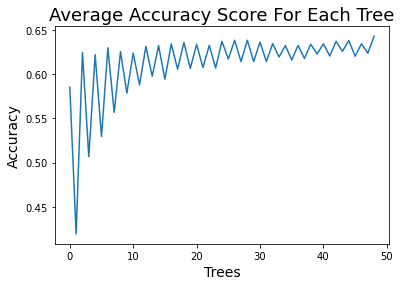

In [264]:
#plotting the mean cross validation scores 
plt.plot(mygs.cv_results_['mean_test_score'])
plt.title('Average Accuracy Score For Each Tree', size=18)
plt.ylabel('Accuracy', size=14)
plt.xlabel('Trees', size=14)

In [183]:
print(f"The Random Forest mean accuracy score is: {round(mygs.cv_results_['mean_test_score'].mean(), 2)}")

The Random Forest mean accuracy score is: 0.61


The best Random Forest from the above grid search had 49 trees. It had a mean validation score of ~61%.

### Predictions and Evaluation

In [185]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions for the test set
y_pred_test = mygs.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.6451058958214081

In [163]:
#getting the predictions
forest_test_pred = mygs.predict(X_test).round()
forest_train_pred = mygs.predict(X_remainder).round()

y_forest_test = (forest_test_pred > 0.5).astype(int)
y_forest_train = (forest_train_pred > 0.5).astype(int)

In [164]:
from sklearn.metrics import classification_report

print_line = "\n=======================================================\n"

# Confusion matrices
print("Classification Report Random Forest:", print_line)

report_initial = classification_report(y_test, y_forest_test)
print(report_initial)

Classification Report Random Forest: 

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       194
           1       0.98      0.54      0.70        79
           2       0.95      0.44      0.61       189
           3       0.92      0.54      0.68       203
           4       0.98      0.68      0.80       234
           5       1.00      0.85      0.92       199
           6       1.00      0.52      0.68        56
           7       0.95      0.85      0.90       183
           8       0.99      0.77      0.87       191
           9       1.00      0.30      0.46       219

   micro avg       0.98      0.65      0.78      1747
   macro avg       0.98      0.63      0.75      1747
weighted avg       0.98      0.65      0.76      1747
 samples avg       0.65      0.65      0.65      1747



The Random Forest did not do very well as correctly identifying true positives, true negatives, false positives or false negatives. 

**Precision:** The fraction of positive predictions that are correct. This score tells us if we have false positives or not and the score ranges from 0 to 1. 1 being a perfect fit.
- The precision averaged around 98%. That means that only 98% of the guesses were correctly predicted a positive match, and 2% were false positives.

**Recall:** The fraction of positive cases which were predicted as positive. This score tells us how much positive/correct guesses were actually predicted as positive. Optimizing this limits False Negative errors. Like precision, the score ranges from 0 to 1. 1 being a perfect fit.
- The average score is 65%, that means that only 65% of the positive/correct guesses were predicted as positive/correct, and 35% were predicted as False Negatives.

**f1-Score:** The harmonic mean of the precision and recall. An F1 score reaches its best value at 1 which corresponds to both perfect precision and perfect recall.
- The `F1` score averages in the 70% range. Meaning our model decent at predicting false positives, or true positives.

**Confusion Matrix**

The confusion matrix tells us how many of a classifier’s predictions were correct, and when incorrect, where the classifier got confused. It's a great function to visualize the True Positives and False Positives. 

The confusion matrix got very confused for me and tried to make a multi-label classification. This is not yet supported for a confusion matrix. Unfortunately because of this you will not be able to see one for any of my models.

Next steps will be to figure out and make a confusion matrix as a multi-class classification.

**AUC-ROC**

A ROC curve is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR).

**TP:** - The true positive rate is the proportion of observations that were correctly predicted to be positive out of all positive observations (TP/(TP + FN)).

**FP:** - The false positive rate is the proportion of observations that are incorrectly predicted to be positive out of all negative observations (FP/(TN + FP)).

AUC (Area Under the Curve) is usually correlated with accuracy. Accuracy is measuring the fraction of points our model gets correct for a fixed threshold. AUC is the probability that when our model is given two random points, one from the positive class and one from the negative class, our model is more confident that the positive point belongs to the positive class than the negative point belonging to the positive class.

In [252]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#getting the predictions
mygs_test_pred = mygs.predict(X_test).round()
mygs_train_pred = nn_model1.predict(X_remainder).round()

y_mygs_test = (mygs_test_pred > 0.5).astype(int)
y_mygs_train = (mygs_train_pred > 0.5).astype(int)

print_line = "\n=======================================================\n"

print("AUC-ROC Scores NN Model 1:", print_line)

# Score (AUC)
multi_test_forest = roc_auc_score(y_test, y_mygs_test, multi_class='ovo', average='weighted')
multi_train_forest = roc_auc_score(y_remainder, y_mygs_train, multi_class='ovo', average='weighted')
print(f'AUC on train set: {multi_train_forest}')
print(f'AUC on test set: {multi_test_forest}')

AUC-ROC Scores NN Model 1: 

AUC on train set: 0.5299577754488636
AUC on test set: 0.8215460046506295


This model achieved a test accuracy of 61%, a average f1 score in the 70's, and an AUC of 0.821.

I wasn't able to figure out how to display a multiclass classification AUC-ROC curve. I found a resource here [link](https://inblog.in/AUC-ROC-score-and-curve-in-multiclass-classification-problems-2ja4jOHb2X). For next steps I will try and plot the ROC-AUC score for each class. The following models will also not have a graph to display AUC-ROC scores.

### Conclusion
The Random Forest Classifier was not the best model to use for audio classification. This model had some serious overfitting going on. 

# Neural Networks

**What is a Neural Network?**

The idea behind Neural Networks (NN) is to act like the densely interconnected brain cells that us humans have. We intake information, recognize patterns and make decisions accordingly. A Neural Network works the same way: It simulates connected layers of 'neurons' by using a series of algorithms that works to mimic the way a human brain operates. Just how we can recognize patterns, and underlying relationships between pieces of information we take it. For example, when we hear a voice we can tell by the inflections if it is angry, happy, or accusatory etc.

**What makes up a NN?**

As with our brain cells, a NN is divided into many layers, sometimes hundreds, but they can be grouped into 3 categories.
1. **Input Layer:** This layer represents the underlying features of our independent variable. If our data has  𝑑  features we will have  𝑑  input units.
2. **Hidden Layer:** The hidden layer(s) transform the input features into a format that is useful for classifying the data. The more hidden layers, and the more units in each layer, the more powerful the overall model is. State of the art networks for complex tasks like image recognition and autonomous driving, have dozens hidden layers (or even hundreds).
3. **Output Layer:** This layer represents the output choice of the model. For classification tasks we have one unit per class, each neuron represents a possible class.

As I have a 10 classification problem with 40 features. The input layer will be (40,), the 40 MFCC's from each audio sample. The output layer will be (,10), the 10 classes of sounds.

The process of building a NN model is as follows:

1. **Build the model:** Declare the structure of the network — primarily the types and sizes of the hidden layers.
2. **Compile the model:** Customize some of the settings that will be used for training.
3. **Train** the model
4. **Evaluate** the model and generate predictions

## NN Model 1

I am going to build a simple NN to start with. I want to get base results and then built on it in other models. I have declared the input layer as the shape of the features, which is (40,). before instantiating and building a sequential NN. I specified the outer layer as number of classes.

In [97]:
from sklearn.preprocessing import StandardScaler

# Define and fit the scaler
scaler = StandardScaler().fit(X_remainder)

# Transform the train and test data
X_remainder_ss = scaler.transform(X_remainder)
X_test_ss = scaler.transform(X_test)

Why should we bother scaling the data? Well - due to the features having different scales, they can influence a model by different magnitudes. In order to address this, we can employ two strategies:

**Standardizaton**

the mean of the data is centred at zero with the scale as units of standard deviation from that mean.
Examples: StandardScaler() and RobustScaler()

**Normalization**

the data is rescaled to a range from 0 to 1.
Example: MinMaxScaler()

I have used the `Standardscaler` to help with normalizing the data.

In [227]:

#step1
#declaring the outerlayer shape
num_labels = y.shape[1]

#declaring the input layer shape
input_shape= (40,)

#instantiating and building 
nn_model1 = keras.Sequential([layers.InputLayer(input_shape=input_shape),
                         layers.Dense(80, activation="relu"),
                         layers.Dense(160, activation="relu"),
                         layers.Dense(320, activation="relu"),
                         layers.Dense(160, activation="relu"),
                         layers.Dense(num_labels, activation="softmax")])

#step2
#Compiling
nn_model1.compile(
                # Optimizer
                optimizer=keras.optimizers.Adam(),  
                # Loss function to minimize
                loss=[keras.losses.CategoricalCrossentropy()],
                # Metric used to evaluate model
                metrics=[keras.metrics.CategoricalAccuracy()]
)
    
#step3
# Train the network
history = nn_model1.fit(X_remainder_ss, y_remainder,
                    epochs=100, batch_size=32, verbose=1, validation_split=0.2,
                    validation_data=(X_test_ss, y_test))

Epoch 1/100
175/175 [==============================] - 1s 4ms/step - loss: 1.3930 - categorical_accuracy: 0.5345 - val_loss: 0.9318 - val_categorical_accuracy: 0.6936
Epoch 2/100
175/175 [==============================] - 1s 4ms/step - loss: 0.7826 - categorical_accuracy: 0.7434 - val_loss: 0.7890 - val_categorical_accuracy: 0.7380
Epoch 3/100
175/175 [==============================] - 1s 5ms/step - loss: 0.5409 - categorical_accuracy: 0.8205 - val_loss: 0.5934 - val_categorical_accuracy: 0.8053
Epoch 4/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4090 - categorical_accuracy: 0.8631 - val_loss: 0.5033 - val_categorical_accuracy: 0.8375
Epoch 5/100
175/175 [==============================] - 1s 4ms/step - loss: 0.3045 - categorical_accuracy: 0.8948 - val_loss: 0.4937 - val_categorical_accuracy: 0.8454
Epoch 6/100
175/175 [==============================] - 1s 4ms/step - loss: 0.2335 - categorical_accuracy: 0.9239 - val_loss: 0.4554 - val_categorical_accuracy: 0.853

In [228]:
nn_model1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 80)                3280      
_________________________________________________________________
dense_98 (Dense)             (None, 160)               12960     
_________________________________________________________________
dense_99 (Dense)             (None, 320)               51520     
_________________________________________________________________
dense_100 (Dense)            (None, 160)               51360     
_________________________________________________________________
dense_101 (Dense)            (None, 10)                1610      
Total params: 120,730
Trainable params: 120,730
Non-trainable params: 0
_________________________________________________________________


In this model we have 210,442 trainable parameters.

In [229]:
# Evaluating the model on the training and testing set
score = nn_model1.evaluate(X_remainder_ss, y_remainder, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))

score = nn_model1.evaluate(X_test_ss, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 97.78%
Testing Accuracy: 89.47%


Here we see this model got a Training accuracy of 97.78% and a Testing accuracy of 89.47%. This is better than the Random Forest above. Even though is a very simple feed forward NN, it does okay with that data provided. The training and testing scores are close together. This means that the model is able to classify unseen data fairly well. I do believe it is over fitting the data quite a bit. 

In the next NN models I will add:
- A **Batchnormalization layer:** This is a layer-by-layer scaling technique that was found to improve the training of deep neural networks and their performance. Batch normalization acts as regularization and the architecture needs to rely less on dropout layers to avoid overfitting. The changes in gradients become less severe (in other words, the loss surface is smoother) which helps the learning process and gives improved performance. Larger learning rates can be used which leads to faster convergence. 
- A **Dropout layer:** This is another way to control overfitting. It randomly 'drops' or leaves out a certain amount of nodes. By leaving out some nodes, we force the neural network to learn more robust features from the data.

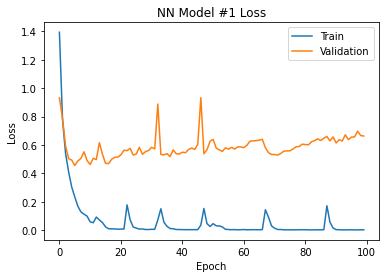

In [230]:
#showing the train loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('NN Model #1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

We can see that right away the more epochs there is, the more the Validation set loss increases. Whereas the Train set quickly drops and stays around zero loss, though it does spike during the 30th and 60th epochs.

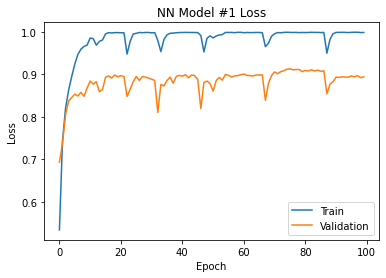

In [231]:
#showing the train accuracy and validation accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('NN Model #1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

The accuracy is a different story than the loss. The Validation set hovers between ~85% and 90% in accuracy. The Train set quickly starts to overfit. This needs a lot of improvement, but its a decent place to start.

### Predictions and Evaluation

In [253]:
#getting the predictions
test_pred = nn_model1.predict(X_test_ss).round()
train_pred = nn_model1.predict(X_remainder_ss).round()

y_hat_hard_test = (test_pred > 0.5).astype(int)
y_hat_hard_train = (train_pred > 0.5).astype(int)

In [254]:
from sklearn.metrics import classification_report

print_line = "\n=======================================================\n"

# Confusion matrices
print("Classification Report NN Model 1:", print_line)

report_initial = classification_report(y_test, y_hat_hard_test)
print(report_initial)

Classification Report NN Model 1: 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       194
           1       0.87      0.91      0.89        79
           2       0.80      0.84      0.82       189
           3       0.89      0.80      0.84       203
           4       0.94      0.88      0.91       234
           5       0.94      0.95      0.94       199
           6       0.73      0.93      0.82        56
           7       0.94      0.95      0.95       183
           8       0.93      0.97      0.95       191
           9       0.87      0.79      0.83       219

   micro avg       0.90      0.89      0.90      1747
   macro avg       0.88      0.90      0.89      1747
weighted avg       0.90      0.89      0.90      1747
 samples avg       0.89      0.89      0.89      1747



Taking a look at the classification report for the NN model 1, it seems that class 8 got the highest scores. All the scores hover between high 80's and high 90's%. 

- The `precision` in our model good. The average score is in the 80%, that means that about 80% of the guesses were correct, and 20% were wrong. That is a decent score.

- The `recall` score in our model good. The average score is 89%, that means that only 89% of the positive/correct guesses were predicted as positive/correct, and 11% were predicted as False Negatives.

- The `F1` score hovers around 80-95%. Meaning our model is quite good at predicting false positives, or true positives. 

We must keep in mind that this model is overfitting.

**AUC-ROC**

In [255]:
#getting the predictions
test_pred = nn_model1.predict(X_test_ss).round()
train_pred = nn_model1.predict(X_remainder_ss).round()

y_hat_hard_test = (test_pred > 0.5).astype(int)
y_hat_hard_train = (train_pred > 0.5).astype(int)

print_line = "\n=======================================================\n"

print("AUC-ROC Scores NN Model 1:", print_line)

# Score (AUC)
multi_test = roc_auc_score(y_test, y_hat_hard_test, multi_class='ovo', average='weighted')
multi_train = roc_auc_score(y_remainder, y_hat_hard_train, multi_class='ovo', average='weighted')
print(f'AUC on train set: {multi_train}')
print(f'AUC on test set: {multi_test}')

AUC-ROC Scores NN Model 1: 

AUC on train set: 0.9874170822863505
AUC on test set: 0.9411845508646287


This was a simple base Neural Network to get a benchmark for the data. It will need some optimization to help with overfitting. This NN_model1 did fairly better than the RF above. Achieving a f1 score ranging from  80-95%, and an AUC of 0.941 on the test set. 

## NN MODEL 2
In this second NN model I will add in a drop out layer and batchnormalization to each layer in the NN. These will help with the major overfitting. 

- **Epochs:** The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.

- **Softftmax: Activation** on the output layer is mostly used for multi-class classification that distributes the probability of each output node.

In [235]:
#step1
#declaring the outerlayer shape
num_labels = y_remainder.shape[1]

#declaring the input layer shape
input_shape= (40,)

# Create a new sequential model
nn_model2 = keras.Sequential([layers.InputLayer(input_shape = input_shape)])

# Declare the hidden layers
nn_model2.add(layers.Dense(80, activation="relu"))
nn_model2.add(layers.Dropout(0.2))
nn_model2.add(layers.BatchNormalization()) 

nn_model2.add(layers.Dense(160, activation="relu"))
nn_model2.add(layers.Dropout(0.2))
nn_model2.add(layers.BatchNormalization()) 

nn_model2.add(layers.Dense(320, activation="relu"))
nn_model2.add(layers.Dropout(0.2))
nn_model2.add(layers.BatchNormalization()) 

nn_model2.add(layers.Dense(160, activation="relu")) 
nn_model2.add(layers.Dropout(0.2))

# Declare the output layer
nn_model2.add(layers.Dense(num_labels, activation="softmax"))

nn_model2.compile(
                # Optimizer
                optimizer=keras.optimizers.Adam(),  
                # Loss function to minimize
                loss=keras.losses.CategoricalCrossentropy(),
                # Metric used to evaluate model
                metrics=[keras.metrics.CategoricalAccuracy()]
    )

num_epochs = 100
num_batch_size = 32

history2 = nn_model2.fit(X_remainder_ss, y_remainder, batch_size=num_batch_size,
          epochs=num_epochs, validation_split=0.2,
          validation_data=(X_test_ss, y_test), verbose=1)

Epoch 1/100
175/175 [==============================] - 1s 5ms/step - loss: 1.8487 - categorical_accuracy: 0.3740 - val_loss: 1.3697 - val_categorical_accuracy: 0.5977
Epoch 2/100
175/175 [==============================] - 1s 5ms/step - loss: 1.4633 - categorical_accuracy: 0.5025 - val_loss: 1.0752 - val_categorical_accuracy: 0.6328
Epoch 3/100
175/175 [==============================] - 1s 5ms/step - loss: 1.2804 - categorical_accuracy: 0.5617 - val_loss: 0.8906 - val_categorical_accuracy: 0.7151
Epoch 4/100
175/175 [==============================] - 1s 5ms/step - loss: 1.1680 - categorical_accuracy: 0.5954 - val_loss: 0.8351 - val_categorical_accuracy: 0.7101
Epoch 5/100
175/175 [==============================] - 1s 5ms/step - loss: 1.0938 - categorical_accuracy: 0.6296 - val_loss: 0.7714 - val_categorical_accuracy: 0.7409
Epoch 6/100
175/175 [==============================] - 1s 5ms/step - loss: 1.0346 - categorical_accuracy: 0.6494 - val_loss: 0.6863 - val_categorical_accuracy: 0.778

In [236]:
nn_model2.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 80)                3280      
_________________________________________________________________
dropout_30 (Dropout)         (None, 80)                0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 80)                320       
_________________________________________________________________
dense_103 (Dense)            (None, 160)               12960     
_________________________________________________________________
dropout_31 (Dropout)         (None, 160)               0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 160)               640       
_________________________________________________________________
dense_104 (Dense)            (None, 320)             

There are 146,698 trainable parameters. For a NN this is not that many. In this model there are 1,024 non-trainable parameters.

In [237]:
# Evaluating the model on the training and testing set
score = nn_model2.evaluate(X_remainder_ss, y_remainder, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))

score = nn_model2.evaluate(X_test_ss, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 96.54%
Testing Accuracy: 88.44%


Here we see this model got a Training accuracy of 96.54% and a Testing accuracy of 88.44%. The training and testing scores slightly moved closer to together, bu the testing accuracy decreased by 1%.

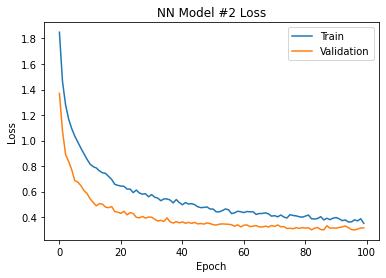

In [238]:
#showing the train loss and validation loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('NN Model #2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

We can see here that the loss for both training and validation sets have a steady rate of decreasing as we move through the epochs. This has greatly improved from the first NN.

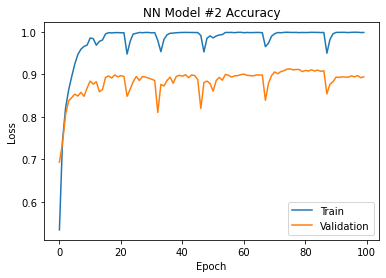

In [256]:
#showing the train accuracy and validation accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('NN Model #2 Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

The accuracy follows the same trajectory as the first model. The train set seems to over fit quite quickly.

### Predictions and Evaluation

In [257]:
#getting the predictions
test_pred_2 = nn_model2.predict(X_test_ss).round()
train_pred_2= nn_model2.predict(X_remainder_ss).round()

y_test_2 = (test_pred_2 > 0.5).astype(int)
y_train_2 = (train_pred_2 > 0.5).astype(int)

In [258]:
from sklearn.metrics import classification_report

print_line = "\n=======================================================\n"

print("Classification Report NN Model 2:", print_line)

report_initial = classification_report(y_test, y_test_2)
print(report_initial)

Classification Report NN Model 2: 

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       194
           1       0.91      0.87      0.89        79
           2       0.78      0.80      0.79       189
           3       0.90      0.79      0.84       203
           4       0.98      0.84      0.90       234
           5       0.99      0.89      0.94       199
           6       0.81      0.89      0.85        56
           7       0.96      0.98      0.97       183
           8       0.97      0.96      0.97       191
           9       0.81      0.80      0.80       219

   micro avg       0.91      0.87      0.89      1747
   macro avg       0.90      0.88      0.89      1747
weighted avg       0.91      0.87      0.89      1747
 samples avg       0.87      0.87      0.87      1747



The `precision`, `recall` and `F1` scores are all relatively the same as the first NN. 

**AUC-ROC Scores**

In [259]:
#getting the predictions
print_line = "\n=======================================================\n"

print("AUC-ROC Scores NN Model 2:", print_line)

# Score (AUC)
multi_test_2 = roc_auc_score(y_test, y_test_2, multi_class='ovo', average='weighted')
multi_train_2 = roc_auc_score(y_remainder, y_train_2, multi_class='ovo', average='weighted')
print(f'AUC on train set: {multi_train_2}')
print(f'AUC on test set: {multi_test_2}')

AUC-ROC Scores NN Model 2: 

AUC on train set: 0.9777744799275049
AUC on test set: 0.931236987634438


NN model 2 achieved a test accuracy of 88%, a average F1 score of 89%, and an AUC of 0.931. This model performed better than the RF, but not much improvement from NN model 1. 

##  NN MODEL 3
For this NN model I will add 2 more layers, equaling several layers.

**The batch size** is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.

In [251]:
#step1
#declaring the outerlayer shape

num_labels = y_remainder.shape[1]

#declaring the input layer shape
input_shape= (40,)

# Create a new sequential model
nn_model3 = keras.Sequential([layers.InputLayer(input_shape = input_shape)])

# Declare the hidden layers
nn_model3.add(layers.Dense(80, activation="relu"))
nn_model3.add(layers.Dropout(0.2))
nn_model3.add(layers.BatchNormalization()) 

nn_model3.add(layers.Dense(160, activation="relu"))
nn_model3.add(layers.Dropout(0.2))
nn_model3.add(layers.BatchNormalization())

nn_model3.add(layers.Dense(320, activation="relu"))
nn_model3.add(layers.Dropout(0.2))
nn_model3.add(layers.BatchNormalization())

nn_model3.add(layers.Dense(320, activation="relu"))
nn_model3.add(layers.Dropout(0.2))
nn_model3.add(layers.BatchNormalization())

nn_model3.add(layers.Dense(160, activation="relu"))
nn_model3.add(layers.Dropout(0.2))
nn_model3.add(layers.BatchNormalization())

nn_model3.add(layers.Dense(80, activation="relu")) 
nn_model3.add(layers.Dropout(0.2))

# Declare the output layer
nn_model3.add(layers.Dense(num_labels, activation="softmax"))

nn_model3.compile(
                # Optimizer
                optimizer=keras.optimizers.Adam(),  
                # Loss function to minimize
                loss=keras.losses.CategoricalCrossentropy(),
                # Metric used to evaluate model
                metrics=[keras.metrics.CategoricalAccuracy()]
    )

num_epochs = 100
num_batch_size = 32

history3 = nn_model3.fit(X_remainder_ss, y_remainder, batch_size=num_batch_size,
          epochs=num_epochs, validation_split=0.2,
          validation_data=(x_test_ss, y_test), verbose=1)

Epoch 1/100
175/175 [==============================] - 1s 8ms/step - loss: 2.1026 - categorical_accuracy: 0.2838 - val_loss: 1.5279 - val_categorical_accuracy: 0.4760
Epoch 2/100
175/175 [==============================] - 1s 7ms/step - loss: 1.6602 - categorical_accuracy: 0.4343 - val_loss: 1.1952 - val_categorical_accuracy: 0.5934
Epoch 3/100
175/175 [==============================] - 1s 7ms/step - loss: 1.4615 - categorical_accuracy: 0.5061 - val_loss: 1.0269 - val_categorical_accuracy: 0.6514
Epoch 4/100
175/175 [==============================] - 1s 7ms/step - loss: 1.3519 - categorical_accuracy: 0.5449 - val_loss: 0.9150 - val_categorical_accuracy: 0.7015
Epoch 5/100
175/175 [==============================] - 2s 9ms/step - loss: 1.2748 - categorical_accuracy: 0.5707 - val_loss: 0.8632 - val_categorical_accuracy: 0.7065
Epoch 6/100
175/175 [==============================] - 2s 9ms/step - loss: 1.2024 - categorical_accuracy: 0.5982 - val_loss: 0.7908 - val_categorical_accuracy: 0.754

In [219]:
nn_model3.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 80)                3280      
_________________________________________________________________
dropout_25 (Dropout)         (None, 80)                0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 80)                320       
_________________________________________________________________
dense_92 (Dense)             (None, 160)               12960     
_________________________________________________________________
dropout_26 (Dropout)         (None, 160)               0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 160)               640       
_________________________________________________________________
dense_93 (Dense)             (None, 320)             

In [260]:
# Evaluating the model on the training and testing set
score = nn_model3.evaluate(X_remainder_ss, y_remainder, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))

score = nn_model3.evaluate(X_test_ss, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 95.81%
Testing Accuracy: 88.49%


Here we see this model got a Training accuracy of 95.81% and a Testing accuracy of 88.49%. The training and testing scores slightly moved closer to together, which tells me the model is improving.

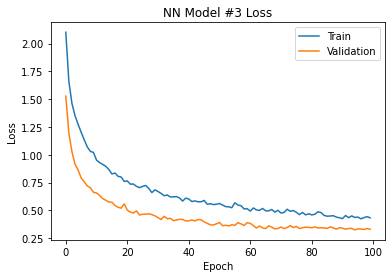

In [261]:
#showing the train loss and validation loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('NN Model #3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

As with NN2, the loss of both the validation and train sets have a decreasing trend.

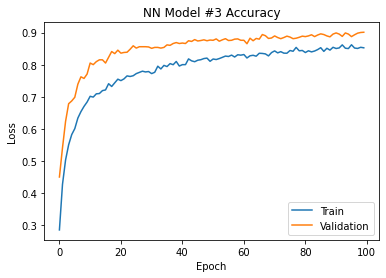

In [246]:
#showing the train accuracy and validation accuracy
plt.plot(history3.history['categorical_accuracy'])
plt.plot(history3.history['val_categorical_accuracy'])
plt.title('NN Model #3 Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Here we see something a bit different than the other NN models. The validation and train sets start to follow each other relatively closely. The over fitting seems to have gone away.

### Predictions and Evaluation

In [247]:
#getting the predictions
test_pred_3 = nn_model3.predict(X_test_ss).round()
train_pred_3 = nn_model3.predict(X_remainder_ss).round()

y_test_3 = (test_pred_3 > 0.5).astype(int)
y_train_3 = (train_pred_3 > 0.5).astype(int)

In [248]:
#classification report for f1, 

print_line = "\n=======================================================\n"

print("Classification Report NN Model 3:", print_line)

report_initial = classification_report(y_test, y_test_3)
print(report_initial)

Classification Report NN Model 3: 

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       194
           1       0.97      0.89      0.93        79
           2       0.76      0.85      0.80       189
           3       0.89      0.73      0.80       203
           4       0.95      0.90      0.92       234
           5       0.99      0.91      0.95       199
           6       0.68      0.84      0.75        56
           7       0.94      0.97      0.95       183
           8       0.96      0.93      0.94       191
           9       0.85      0.77      0.81       219

   micro avg       0.90      0.87      0.89      1747
   macro avg       0.90      0.87      0.88      1747
weighted avg       0.91      0.87      0.89      1747
 samples avg       0.86      0.87      0.87      1747



In comparison with the previous NN models: All the scores stayed relatively the same. I have more confidence in this models scores than the others because there wasn't as much over fitting on the training data.

**AUC-ROC Scores**

In [262]:
print_line = "\n=======================================================\n"

print("AUC-ROC Scores NN Model 3:", print_line)

# Score (AUC)
multi_test_3 = roc_auc_score(y_test, y_test_3, multi_class='ovo', average='weighted')
multi_train_3 = roc_auc_score(y_remainder, y_train_3, multi_class='ovo', average='weighted')
print(f'AUC on train set: {multi_train_3}')
print(f'AUC on test set: {multi_test_3}')

AUC-ROC Scores NN Model 3: 

AUC on train set: 0.9727900705089222
AUC on test set: 0.930303647383756


NN model 3 achieved a test accuracy of 88%, a average F1 score of 89%, and an AUC of 0.930. This model performed better than the previous NN models and the RF.

This still needs a lot of tweaking. The next steps here would be to do some more parameter tuning to increase accuracy, and AUC-ROC scores.

### Saving model

In [374]:
nn_model3.save('models/nn3')

INFO:tensorflow:Assets written to: models/nn3/assets


# Model Conclusions
Overall, I found that optimizing this Neural Networks myself was very difficult. Due to the random nature of neural networks, each training run gave different results, and it was challenging to find ways to improve the performance of the network and be confident that changes weren't simply due to random chance.

The Random Forest Classifier usually works quite well for classification tasks. This time though, a RF was not the best model to use for audio classification. It simply overfit the training data right away.

The Neural Network models steadily increased with tuning the hyper-parameters. This model could potentially increase in over all performance by more fine tuning of the hyperparameters.


|Model | Training Score | Testing Score | ROC-AUC Test|
|:----:|:------------:|:---------------:|:-----------:|
| RF   |     99%      |     64%         |    0.821    |
| NN 1 |     97.78%   |     89.47%      |    0.941    |
| NN 2 |     96.54%   |     88.44%      |    0.931    |
| NN 3 |     95.81%   |     88.49%      |    0.930    |


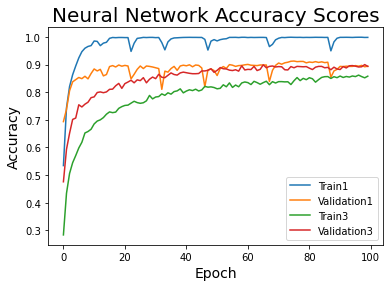

In [268]:
#showing the accuracy scores of each model
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.plot(history3.history['categorical_accuracy'])
plt.plot(history3.history['val_categorical_accuracy'])
plt.title('Neural Network Accuracy Scores', size=20)
plt.ylabel('Accuracy', size=14)
plt.xlabel('Epoch', size=14)
plt.legend(['Train1', 'Validation1', 'Train3', 'Validation3'])
plt.show()

**NEXT STEPS**

First I would like to build a model and on each k fold with the fold folder of audio samples. So that each k-fold gets a different sample of fold folders. As with how the people at [Urban Sound](https://urbansounddataset.weebly.com/urbansound8k.html) have describe how to test and train with this data.
Secondly I will build and train a CNN model, going through the same kind of iterative process as the above NN, on the spectrogram images, and potentially a RNN.